#Explorando os dados



In [135]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scikit-learn (sklearn): 1.6.1
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


####Entendendo o conjunto de dados

In [136]:
dados = pd.read_csv('/content/flights.csv')

In [137]:
dados

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [138]:
#ver as últimas 5 linhas, e entender quantas linhas tem o arquivo , no caso: 71174 linhas
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [139]:
# 11 colunas
dados.shape

(71175, 11)

In [140]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [141]:
# variáveis 'colunas' categoricas
dados.describe(include = 'O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [142]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


####Visualização gráfica dos dados

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

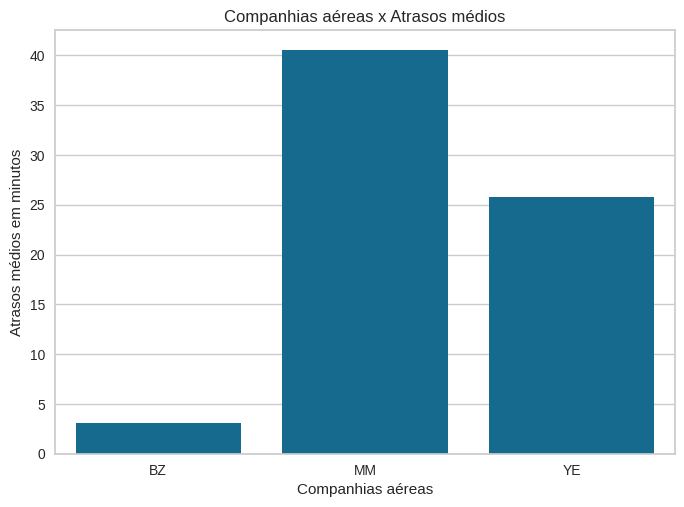

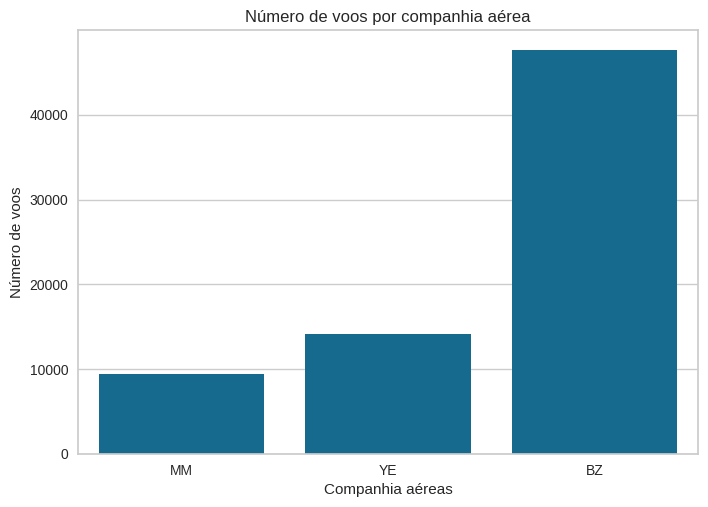

In [144]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas x Atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(x='airline', data=dados)
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aéreas')
plt.ylabel('Número de voos')
plt.show()

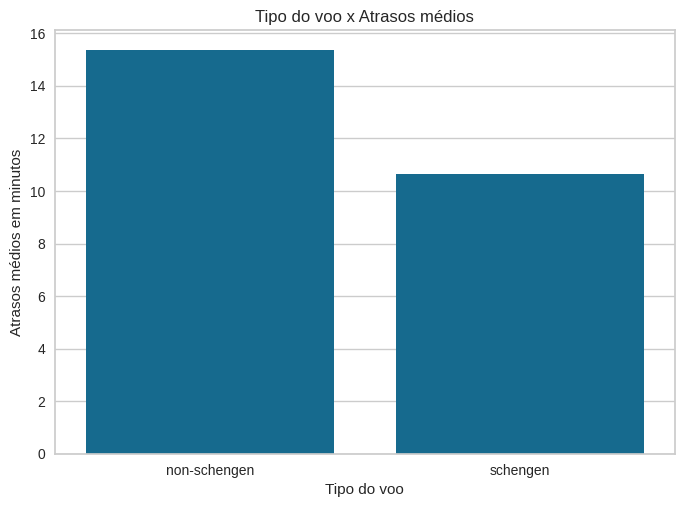

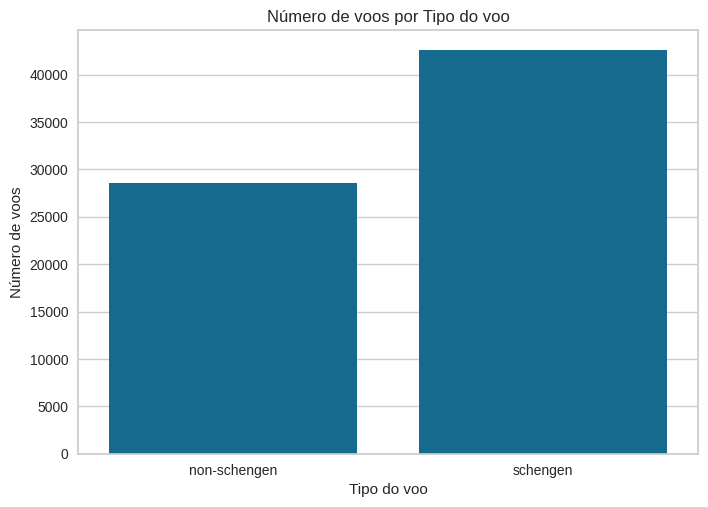

In [145]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo x Atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atrasos médios em minutos')
plt.show()

sns.countplot(x='schengen', data=dados)
plt.title('Número de voos por Tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

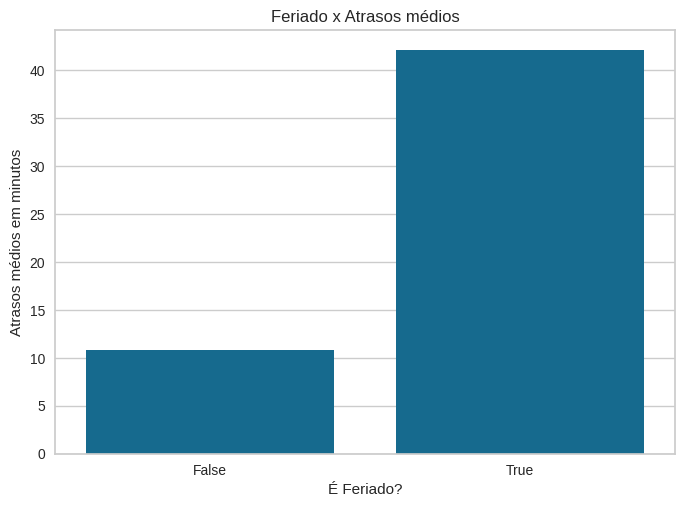

In [146]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado x Atrasos médios')
plt.xlabel('É Feriado?')
plt.ylabel('Atrasos médios em minutos')
plt.show()

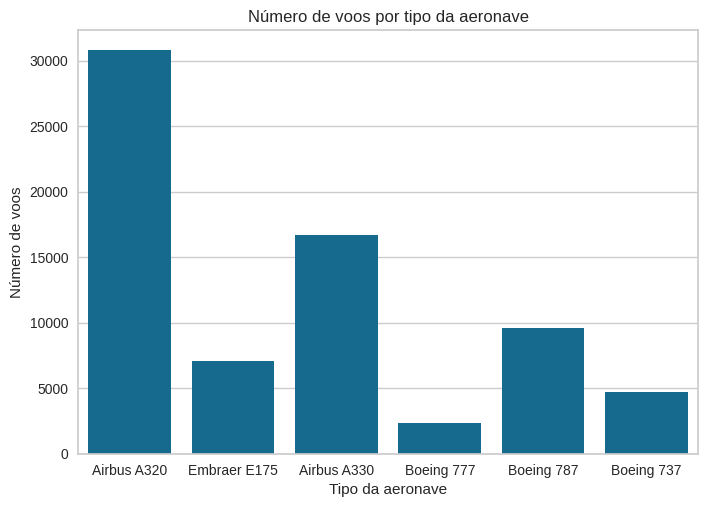

In [147]:
sns.countplot(data=dados, x='aircraft_type')
plt.title('Número de voos por tipo da aeronave')
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

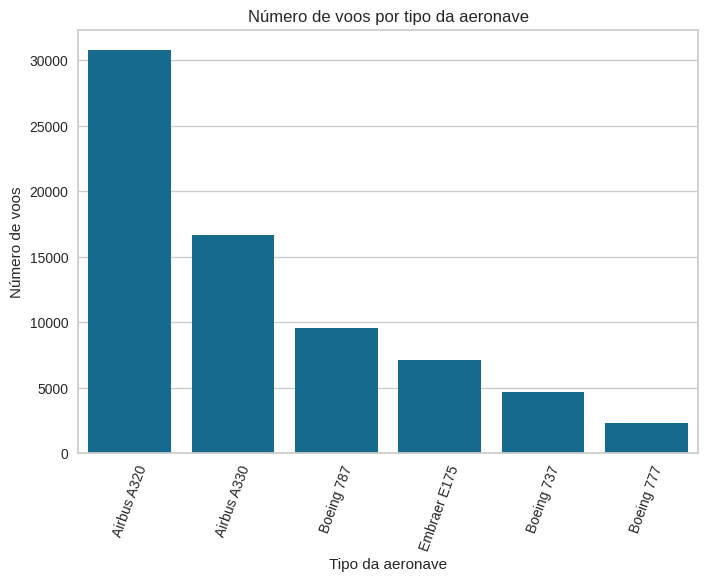

In [148]:
# Organizando por ordem decrescente o gráfico anterior
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

####Analizando a distribuição dos dados

<Axes: xlabel='arrival_time', ylabel='Count'>

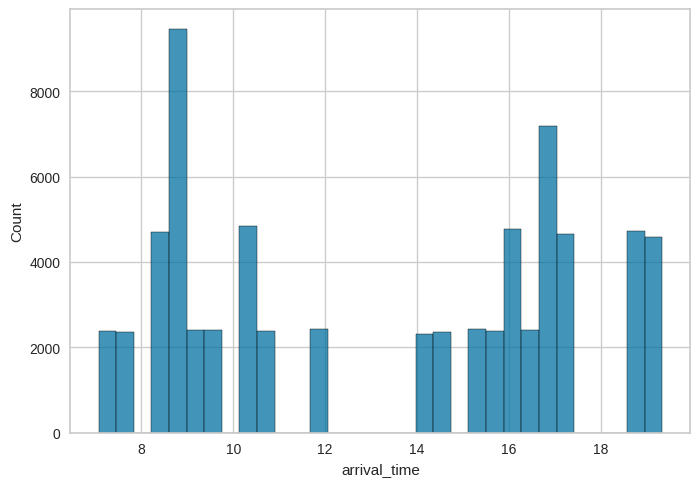

In [149]:
sns.histplot(data=dados, x='arrival_time')

<Axes: xlabel='arrival_time', ylabel='Count'>

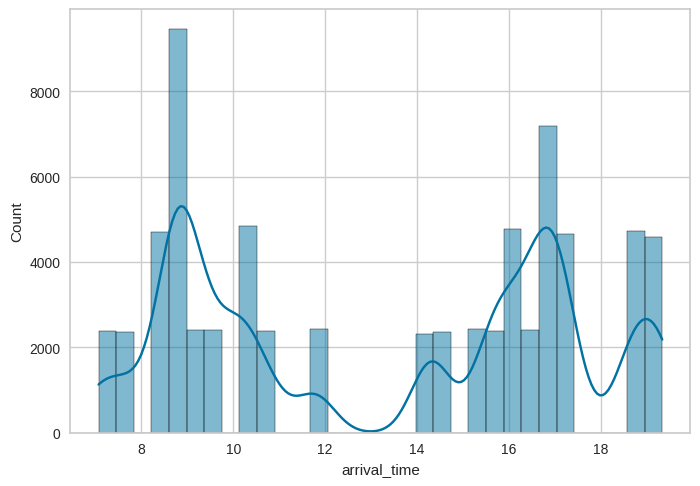

In [150]:
sns.histplot(data=dados, x='arrival_time', kde=True)

In [151]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75, 25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

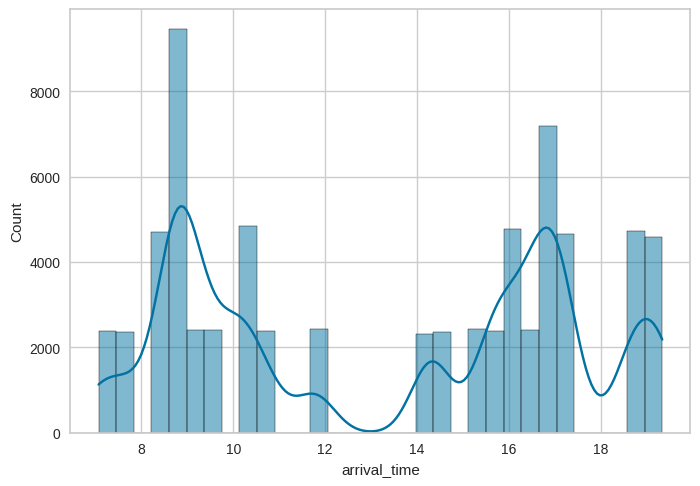

In [152]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

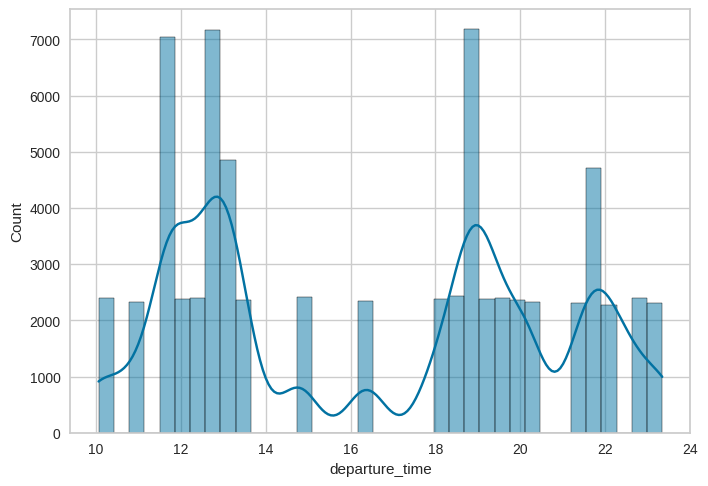

In [153]:
largura_bin_at = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_at)

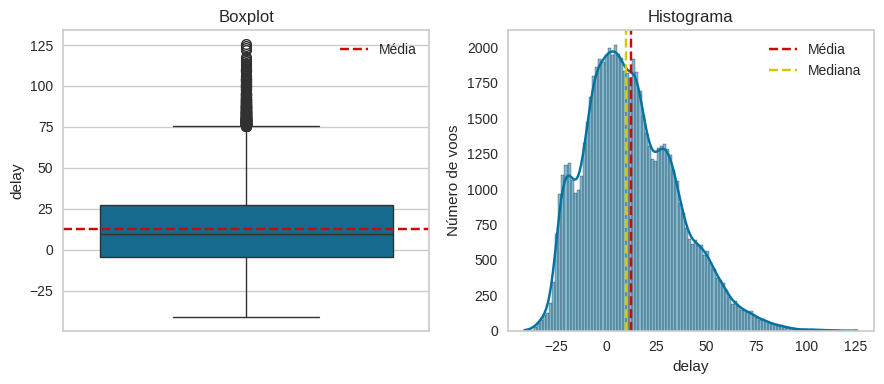

In [154]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay,color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth= largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# O boxplot é usado para visualizar a distribuição dos dados e identificar possíveis outliers.
# Ele mostra os quartis (Q1, Q2 e Q3), a mediana (Q2), além de indicar a presença de valores extremos ou discrepantes.

#Feature Engineering

####Criando novas colunas

In [155]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [156]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])

In [157]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


Feature engineering é um conceito fundamental no campo da ciência de dados e aprendizado de máquina, e desempenha um papel crucial no processo de desenvolvimento de modelos preditivos e analíticos. Essa técnica envolve a criação, transformação e seleção de variáveis, também conhecidas como "features", a partir dos dados brutos disponíveis, a fim de melhorar o desempenho dos modelos. Mas o que seriam features?

**O que são features?**

Features são as variáveis ou atributos que um modelo de machine learning utiliza para fazer previsões ou classificações. Elas representam as informações que o modelo tem à sua disposição para aprender padrões nos dados. Por exemplo, se estivermos construindo um modelo para prever o preço de uma casa, as features podem incluir o número de quartos, a metragem quadrada, a localização geográfica, a proximidade de escolas, entre outras.

**A importância do Feature Engineering:**

1. Melhora o desempenho do modelo: Escolher as features certas e transformá-las adequadamente pode resultar em modelos mais precisos e eficientes. Features bem projetadas podem capturar informações relevantes e eliminar ruído nos dados.
2. Reduz a dimensionalidade: Em datasets com muitas features, a dimensionalidade dos dados pode se tornar um problema. O feature engineering pode ajudar a reduzir a quantidade de features, mantendo apenas aquelas que são realmente informativas para o modelo.

**Técnicas de Feature Engineering:**

Existem várias técnicas de feature engineering, incluindo:

1. Criação de features: Isso envolve a criação de novas features com base nas existentes. Por exemplo, combinar as features de metragem e valor de um imóvel para criar uma feature que representa o valor por metro quadrado daquele imóvel. Ou ainda, se você tem dados de data e hora, pode criar uma nova característica que representa o dia da semana. Isso pode ser útil porque talvez haja padrões que ocorrem em dias específicos da semana.
2. Transformação de features: Pode-se aplicar funções matemáticas às features existentes para torná-las mais adequadas para o modelo. Exemplos incluem aplicar logaritmos ou escalonar valores para reduzir a escala em que a variável está.
3. Seleção de features: Nem todas as features são igualmente importantes. A seleção de features envolve identificar e manter apenas as mais relevantes para o problema em questão.

####Feature Encoding

In [158]:
dados.nunique()

,0
flight_id,30
airline,3
aircraft_type,6
schengen,2
origin,10
arrival_time,30
departure_time,30
day,365
year,13
is_holiday,2


In [159]:
dados['is_weekend'].unique()

array([False,  True])

In [160]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

/tmp/ipython-input-160-2385380026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
/tmp/ipython-input-160-2385380026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
/tmp/ipython-input-160-2385380026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [161]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [162]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


####Limpando os dados

In [163]:
dados[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [164]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#Seleção e validação do modelo

####Treinamento do DummyRegressor

In [165]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [167]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [168]:
y_pred_dummy = model_dummy.predict(X_test)

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def calcular_metricas_regressao(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  metricas = {
      'Raiz do Erro Quadrático Médio': round(rmse, 4),
      'Erro Absoluto Médio': round(mae, 4),
      'R2 Score': round(r2, 4)
  }

  return metricas

In [170]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': np.float64(23.2241),
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

Mean squared error - MSE (Erro Quadrático Médio);

Mean absolute error - MAE (Erro Absoluto Médio);

Root Mean Squared Error - RMSE (Raiz Quadrada do Erro Quadrático Médio);

Mean Squared Logarithmic Error - MSLE (Erro Logarítmico Quadrático Médio);


Mean Absolute Percentage Error - MAPE (Percentual do Erro Absoluto Médio).

####Treinamento do RandomForestRegressor

In [171]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)
#quanto mais o R2 score perto de melhor o modelo

{'Raiz do Erro Quadrático Médio': np.float64(13.7301),
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


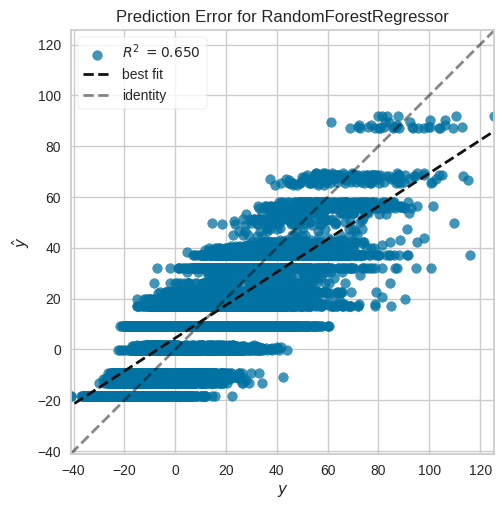

In [172]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


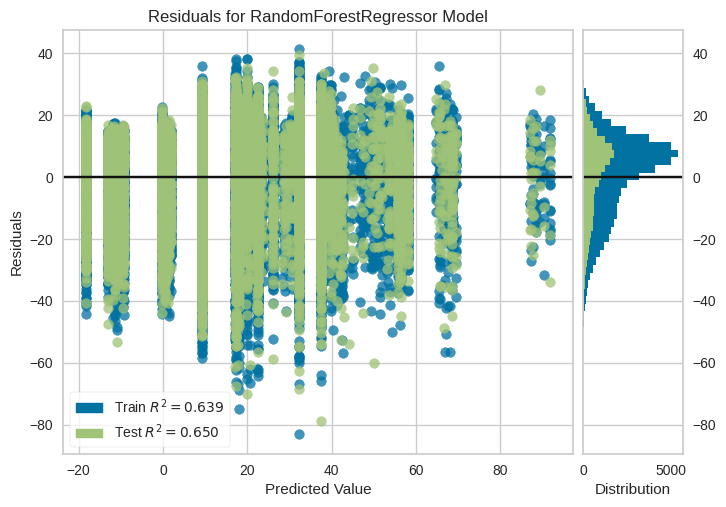

In [173]:
from yellowbrick.regressor import  residuals_plot
viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

####Realizando a validação cruzada

É uma técnica que divide o conjunto de dados em k partes iguais, treina o modelo em k-1 partes e avalia o modelo na parte restante. Isso é repetido k vezes, cada vez com uma parte diferente sendo usada como conjunto de teste.

A validação cruzada é uma técnica robusta usada para avaliar a performance de um modelo de aprendizado de máquina. Ela divide o conjunto de dados em 'k' partes iguais, ou 'folds', treina o modelo em 'k-1' dessas partes e testa o modelo na parte restante. Este processo é repetido 'k' vezes, cada vez com uma parte diferente sendo usada como conjunto de teste. Cada uma dessas iterações é chamada de 'fold', e a média da medida de desempenho em todas as 'k' iterações fornece uma estimativa mais confiável do desempenho do modelo.

In [174]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([4.61304784, 3.3715241 , 4.95806456, 4.49316287, 3.5661242 ]),
 'score_time': array([0.06544733, 0.05965972, 0.06239557, 0.0607717 , 0.07167602]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [177]:
for metric in scoring.keys():
  scores = cv_results[f'test_{metric}']
  mean_score = '{:.3f}'.format(scores.mean())
  std_score = '{:.3f}'.format(scores.std())

  print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
  print(f'{metric.upper()} Média: {mean_score}, Std: {std_score}')
  print('---------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.088
---------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
---------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.008
---------------------------------------------------------------


#Otimização de hiperparâmetros

####Seleção de recursos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


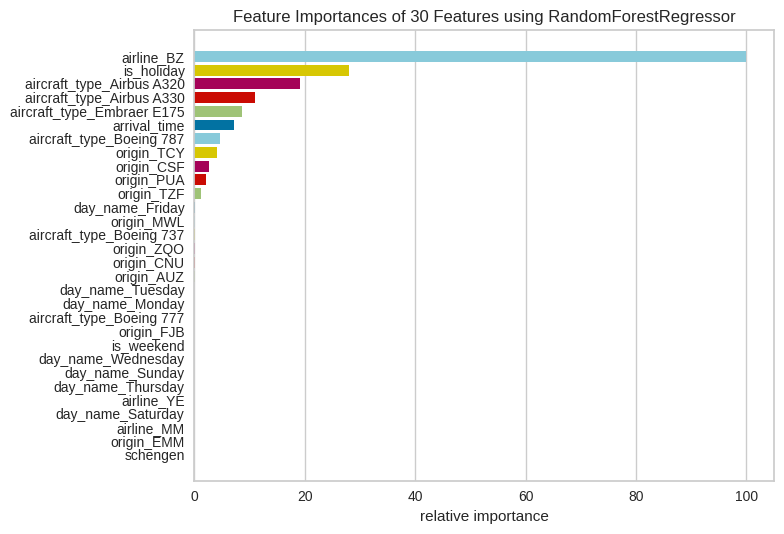

<Axes: title={'center': 'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [181]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(X_train, y_train)
viz.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


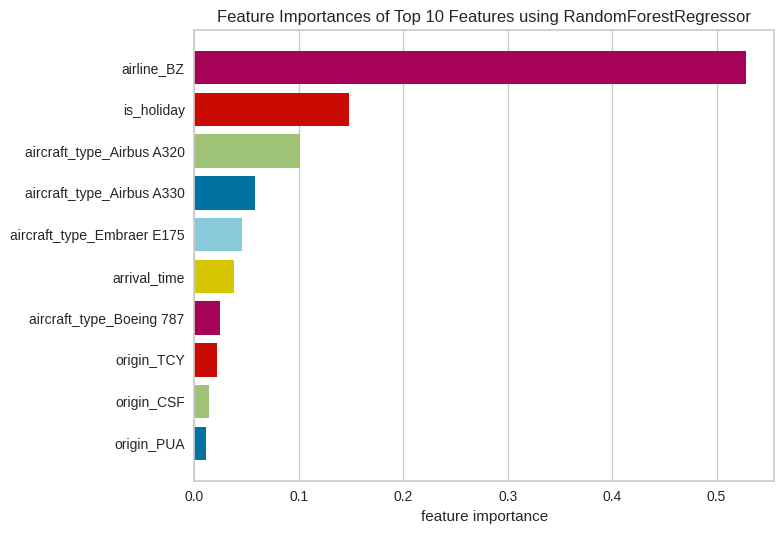

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [182]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10) # vizualizar apenas as 10 Features mais importantes
viz.fit(X_train, y_train)
viz.show()

In [191]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [192]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
  selected_features = feature_importances['Features'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)

  y_pred = model_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


In [195]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
  selected_features = feature_importances['Features'].values[:count]

  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  model_selected_features.fit(X_train_selected, y_train)

  y_pred = model_selected_features.predict(X_test_selected)

  metricas = calcular_metricas_regressao(y_test, y_pred)

  results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [199]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features.head()

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175
0,0,8.885071,0,0,0,1,0,1,0,0,0,0,0
1,0,8.939996,0,0,0,0,1,1,0,0,0,0,0
2,1,18.635384,0,0,1,0,0,0,0,0,0,0,1
3,0,15.967963,0,0,1,0,0,0,1,0,0,0,0
4,0,16.571894,0,0,1,0,0,0,1,0,0,0,0


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)


####Otimizando hiperparâmetros com o GridSearchCV

In [202]:
from sklearn.model_selection import  GridSearchCV

In [201]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

Para calcular quantas vezes o algoritmo é treinado e testado, multiplicamos o número de combinações únicas de hiperparâmetros pelo número de folds na validação cruzada. Existem 3 opções para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' e 3 para 'n_estimators'. Portanto, o número total de combinações únicas de hiperparâmetros é 3 * 3 * 3 * 3 = 81. Como estamos usando validação cruzada de 3 folds, cada conjunto de hiperparâmetros será treinado e testado 3 vezes. Portanto, o algoritmo será treinado e testado 81 * 3 = 243 vezes no total.

In [203]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [204]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [205]:
y_pred_model_grid = model_grid.predict(X_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': np.float64(13.7406),
 'Erro Absoluto Médio': 11.0253,
 'R2 Score': 0.6499}

In [206]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6499


####Salvando o modelo

In [207]:
import pickle

In [209]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!')
except Exception as e:
  print('Ocorreu um erro ao salva o modelo: ', str(e))


Modelo salvo com sucesso!
